#                        Aerofit - Descriptive Statistics & Probability

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing aerofit csv file

In [2]:
aerofit_data = pd.read_csv('aerofit.csv')

# Seggregating categorical and numerical variables

In [3]:
aerofit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
aerofit_data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


The raw data set 'aerofit_data' has 9 columns out of which 4(Product, Gender, MaritalStatus,Fitness ) are categorical variables and 5(Age, Education, Usage, Income, Miles) are numerical variables, 180 rows.

# Checking for duplicates

In [6]:
aerofit_data.duplicated().sum()

0

No duplicate values found.

# Checking for null values

In [7]:
aerofit_data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No null values found.

There are no columns to split or explode. The data is clean and neat for analysis.

# Creating a copy of original data

In [8]:
aerofit_data_temp = aerofit_data.copy()

In [9]:
aerofit_data_temp

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# Exploring Categorical variables

In [10]:
aerofit_data_temp['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are three categories in Product Column - KP281, KP481, KP781.

In [11]:
aerofit_data_temp['Gender'].unique()

array(['Male', 'Female'], dtype=object)

There are two categories in Gender Column - Male, Female.

In [12]:
aerofit_data_temp['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

There are two categories in MaritalStatus column - Single, Partnered .

In [13]:
aerofit_data_temp['Fitness'].unique()

array([4, 3, 2, 1, 5])

There are five categories in Fitness column - 1, 2, 3, 4, 5 .

# Adding fitness_category and age_group as categories for categorization of users

In [14]:
#Fitness 1:'Poor',2: 'Below Average',3: 'Above Average', 4: 'Good', 5: 'Excellet'
aerofit_data_temp['fitness_category']= aerofit_data_temp['Fitness'].replace(
                                        {1:'Poor',2: 'Below Average',3: 'Above Average', 4: 'Good', 5: 'Excellet'})

In [15]:
aerofit_data_temp['age_group'] = aerofit_data_temp['Age']

In [16]:
#Age group 0-20: Teen , 21-35: Adult, 35-45: Middle Aged, 45-60: Elder
aerofit_data_temp['age_group']= pd.cut(aerofit_data_temp.age_group,
                                       bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])

In [17]:
aerofit_data_temp

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Above Average,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Above Average,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Above Average,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Below Average,Teen
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellet,Middle Aged
176,KP781,42,Male,18,Single,5,4,89641,200,Good,Middle Aged
177,KP781,45,Male,16,Single,5,5,90886,160,Excellet,Middle Aged
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellet,Elder


# Value counts of Categorical Variables 

In [18]:
aerofit_data_temp['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [19]:
aerofit_data_temp['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [20]:
aerofit_data_temp['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [21]:
aerofit_data_temp['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

# UniVariate Analysis

<ipython-input-22-a389faaff0e1>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,2)


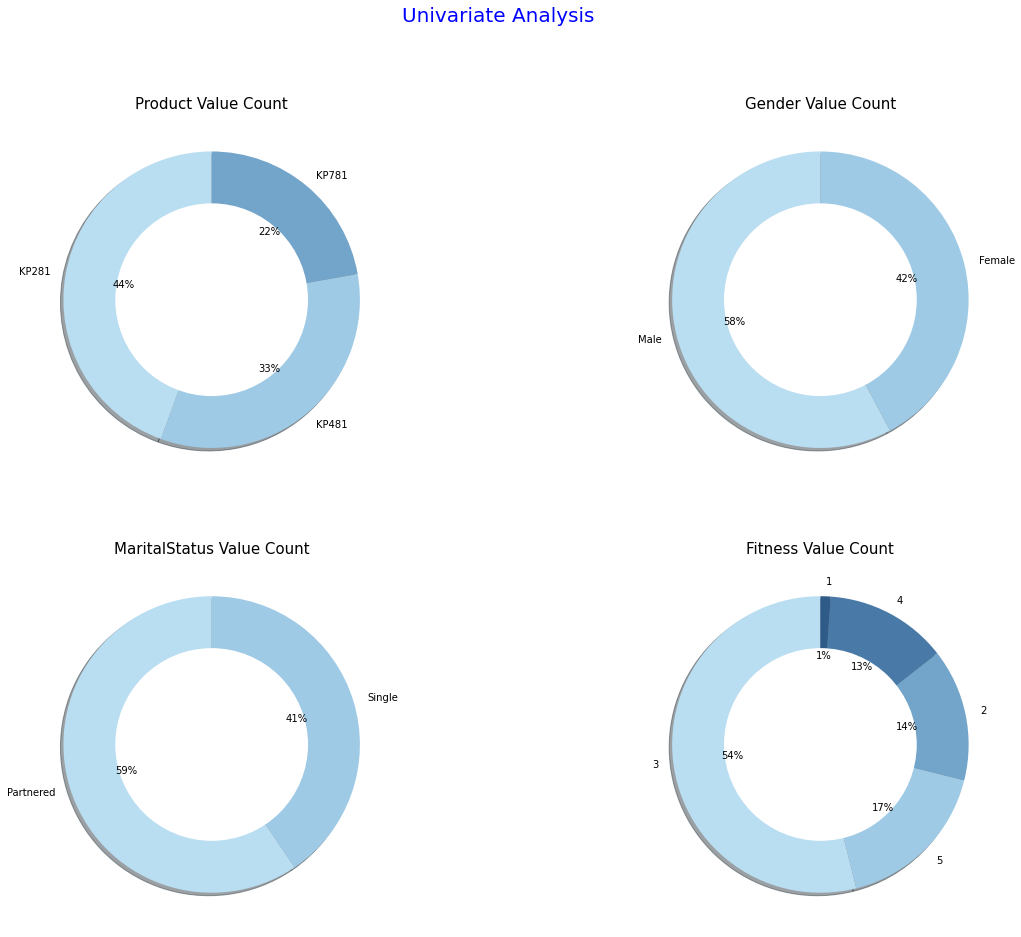

In [22]:
palette_color = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]

figure = plt.figure(figsize=(20,15))
plt.subplot(2,2,2)

plt.subplot(2,2,1)
plt.pie(list(aerofit_data_temp['Product'].value_counts().values), 
        labels = list(aerofit_data_temp['Product'].value_counts().index),
        colors= palette_color, autopct='%.0f%%',  shadow = True, startangle=90)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title("Product Value Count", fontsize=15)

plt.subplot(2,2,2)
plt.pie(list(aerofit_data_temp['Gender'].value_counts().values), 
        labels = list(aerofit_data_temp['Gender'].value_counts().index),
        colors=palette_color, autopct='%.0f%%',  shadow = True, startangle=90)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title("Gender Value Count", fontsize=15)

plt.subplot(2,2,3)
plt.pie(list(aerofit_data_temp['MaritalStatus'].value_counts().values), 
        labels = list(aerofit_data_temp['MaritalStatus'].value_counts().index),
        colors=palette_color, autopct='%.0f%%',  shadow = True, startangle=90)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title("MaritalStatus Value Count", fontsize=15)

plt.subplot(2,2,4)
plt.pie(list(aerofit_data_temp['Fitness'].value_counts().values), 
        labels = list(aerofit_data_temp['Fitness'].value_counts().index),
        colors=palette_color, autopct='%.0f%%',  shadow = True, startangle=90)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title("Fitness Value Count", fontsize=15)

plt.suptitle("Univariate Analysis", fontsize=20, color= 'Blue')
plt.show()

Insight: From the above plot it can be observed that:

    - KP281 has the heighest overall count in Product category. 

    - Males having heightest percentage in overall Gender category. 

    - Partnered has heighest count in MaritalStatus Category 

    - People with Fitness level 3 having the heighest overall count in Fitness category.

# Describing continuous variables

In [23]:
aerofit_data_temp.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Descriptive Analysis:
    
    Total count of all columns is 180.

    Age: Mean age of the customer is 28 years, half of the customer's mean age is 26.

    Education: Mean Education is 15 with maximum as 21 and minimum as 12.

    Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.

    Fitness: Average rating is 3.3 on a scale of 1 to 5.

    Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.

    Income: Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K.

# Outlier detection

/Users/manimahesh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manimahesh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manimahesh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

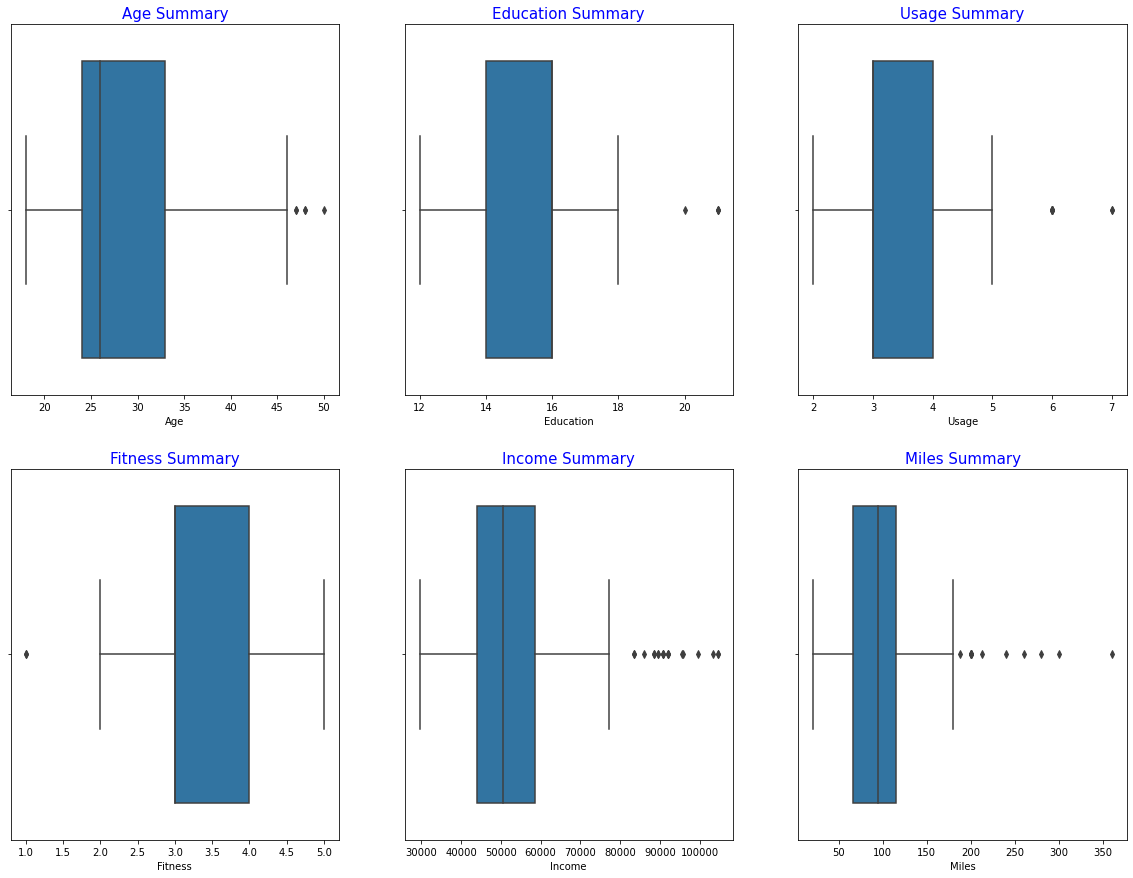

In [24]:
palette_color = ['blue','red','yellow','grey','green']
figure = plt.figure(figsize=(20,15))
#plt.subplot(2,3,2)

plt.subplot(2,3,1)
sns.boxplot(aerofit_data_temp.Age)
plt.title("Age Summary", fontsize = 15, color = 'blue')

plt.subplot(2,3,2)
sns.boxplot(aerofit_data_temp.Education)
plt.title("Education Summary", fontsize = 15, color = 'blue')

plt.subplot(2,3,3)
sns.boxplot(aerofit_data_temp.Usage)
plt.title("Usage Summary", fontsize = 15, color = 'blue')

plt.subplot(2,3,4)
sns.boxplot(aerofit_data_temp.Fitness)
plt.title("Fitness Summary", fontsize = 15, color = 'blue')

plt.subplot(2,3,5)
sns.boxplot(aerofit_data_temp.Income)
plt.title("Income Summary", fontsize = 15, color = 'blue')

plt.subplot(2,3,6)
sns.boxplot(aerofit_data_temp.Miles)
plt.title("Miles Summary", fontsize = 15, color = 'blue')

plt.show()

Insight: From the above box plots, it is observed that:

- Maximum number of aerofit customers are adults between 23-33 and some outliers observed between age 
45-50.
         
- Maximum number of aerofit customers have an education summary between 14-16 years and some outliers are observed above 20 years.
           
- Maximum number of aerofit customers use the treadmill 3-4 times a week on average and there are some outliers observed whose use 6-7 times a week on average.
           
- Maximum number of aerofit customers has a fitness of 3-4 on a scale of 5 and there are some outliers minimum fitness level of 1.
           
- Maximum number of aerofit customers have an income summary raninging from 45k-60k and outliers are     observed above 85k.
         
- Maximum number of aerofit customers have an average mile summary between 75-125 miles per week and some outliers are observed who has a record aove 200 miles average run/walk in a week.

# Checking if features like marital status, age have any effect on the product purchased 

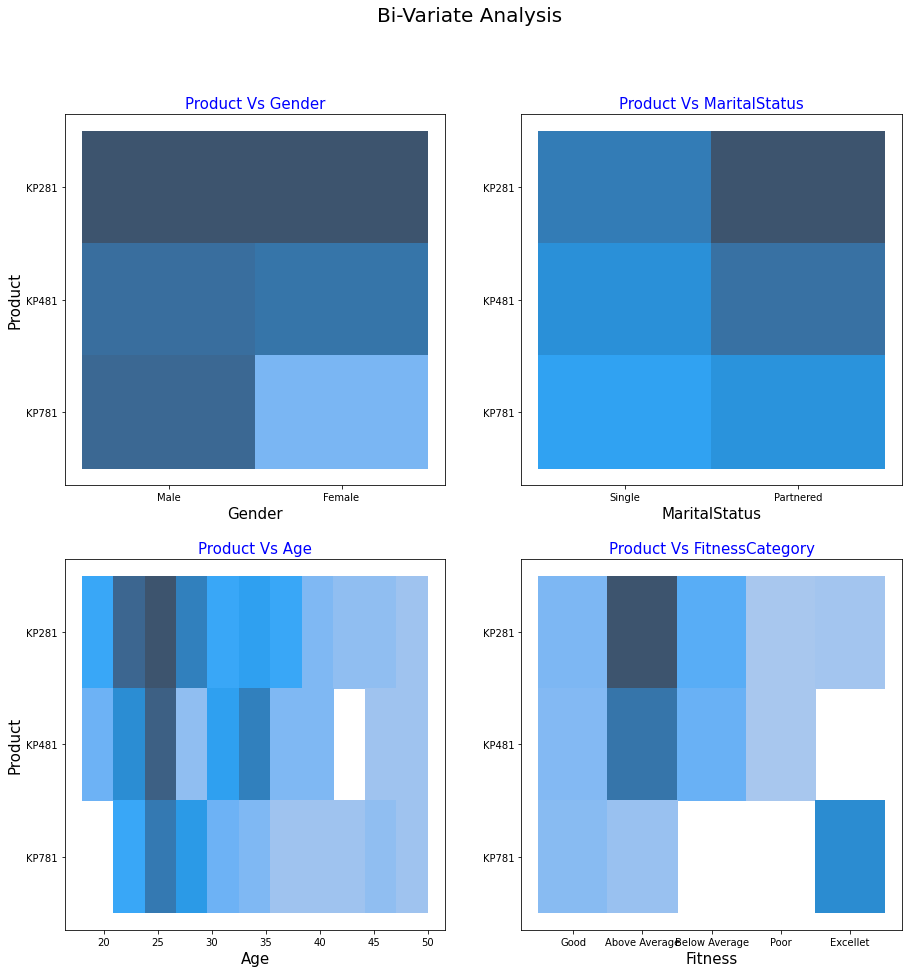

In [25]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.histplot(x= aerofit_data_temp.Gender, y = aerofit_data_temp.Product, bins = 5)
plt.title("Product Vs Gender", fontsize=15, color = 'Blue')
plt.xlabel("Gender", size=15, color='Black')
plt.ylabel("Product",size=15, color='Black')

plt.subplot(2,2,2)
sns.histplot(x= aerofit_data_temp.MaritalStatus, y = aerofit_data_temp.Product)
plt.title("Product Vs MaritalStatus", fontsize=15, color = 'Blue')
plt.xlabel("MaritalStatus", size=15, color='Black')
plt.ylabel("")

plt.subplot(2,2,3)
sns.histplot(x= aerofit_data_temp.Age, y = aerofit_data_temp.Product)
plt.title("Product Vs Age", fontsize=15, color = 'Blue')
plt.xlabel("Age", size=15, color='Black')
plt.ylabel("Product", size=15, color='Black')

plt.subplot(2,2,4)
sns.histplot(x= aerofit_data_temp.fitness_category, y = aerofit_data_temp.Product)
plt.title("Product Vs FitnessCategory", fontsize=15, color = 'Blue')
plt.xlabel("Fitness", size=15, color='Black')
plt.ylabel("")

plt.suptitle('Bi-Variate Analysis', fontsize=20, color='Black')
plt.show()

Insights: 
    
    K281 is bought by both Male and Female equally, where as KP481 and KP781 are bought more by Male than Female.
    
    All the products are bought more by Parenered than Single customers where as KP281 is the best baught product both by siggle and partnered customers next comes KP481 and KP781.
    
    All the products are mostly baught by customers aged between 20-30.Amongst the three products KP281 is baught by all age group, KP481 has no sales in the age group 40-45 and KP7821 is not baught by Teen customers.
    
    Only customers with Excellent, good and above average fitness leve(3,4,5) tends to buy KP781. AboveAverage fitness(3) customers has most percentage of KP481. KP281 is mostly used by customers with above average fitnesslevel(3).

# Checking correlation among different factors using heat maps and pair plots.

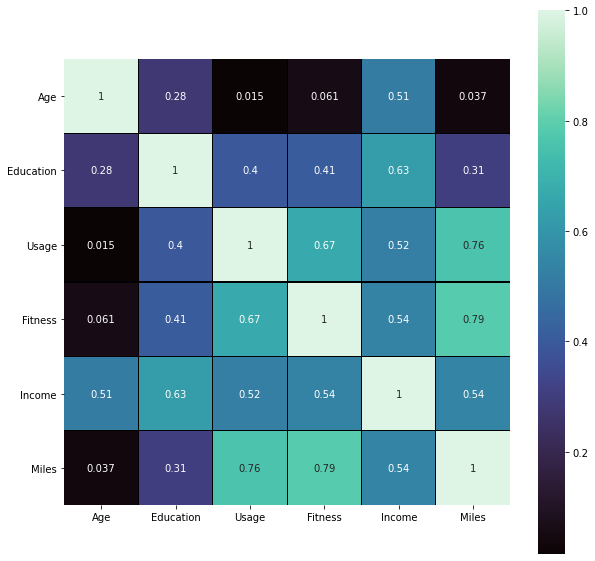

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(aerofit_data_temp.corr(),annot=True, cmap = 'mako',linewidths=0.1, 
            square= True, linecolor= 'Black')
plt.yticks(rotation=0)
plt.show()

Insights: 
    There is more correlation between Fitness-Miles (0.79), Usage-Miles (0.76), Usage-Fitness(0.67), 
    Fitness-Income(0.54),Usage-Income (0.52). 

<Figure size 720x720 with 0 Axes>

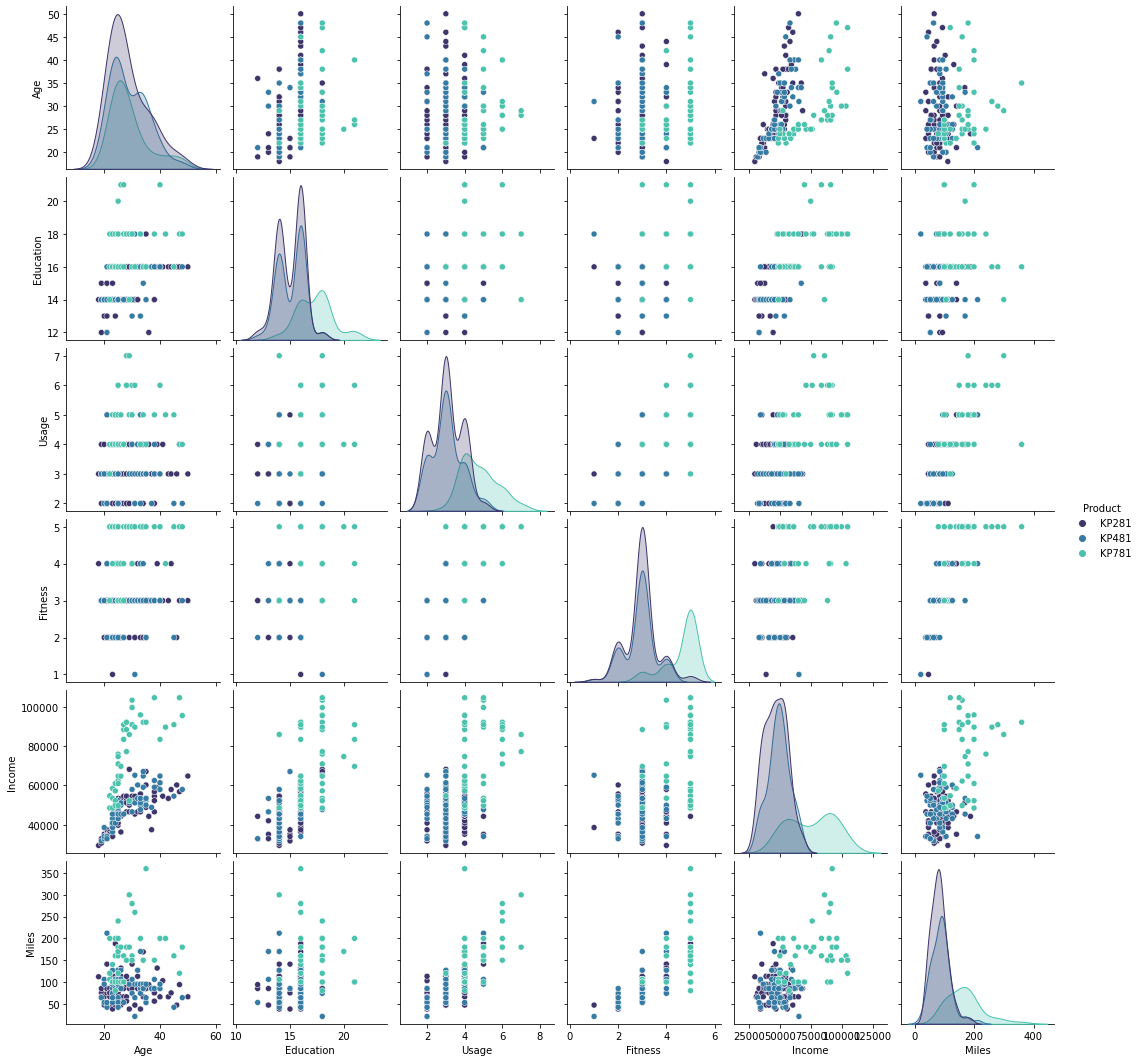

In [27]:
plt.figure(figsize=(10,10))
sns.pairplot(aerofit_data_temp, hue = 'Product', palette='mako')
plt.show()

<Figure size 720x720 with 0 Axes>

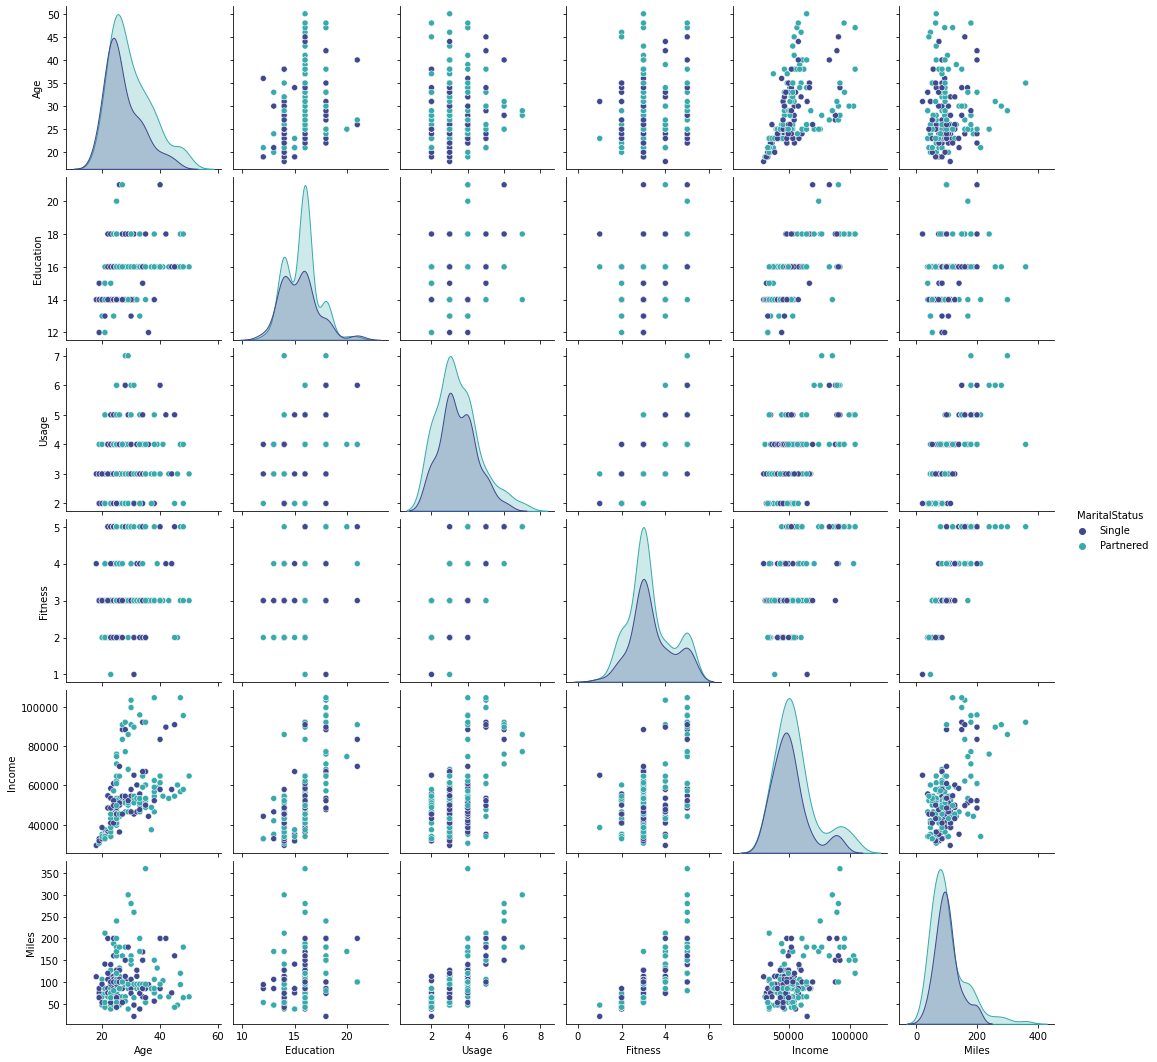

In [28]:
plt.figure(figsize=(10,10))
sns.pairplot(aerofit_data_temp, hue = 'MaritalStatus', palette='mako')
plt.show()

<Figure size 720x720 with 0 Axes>

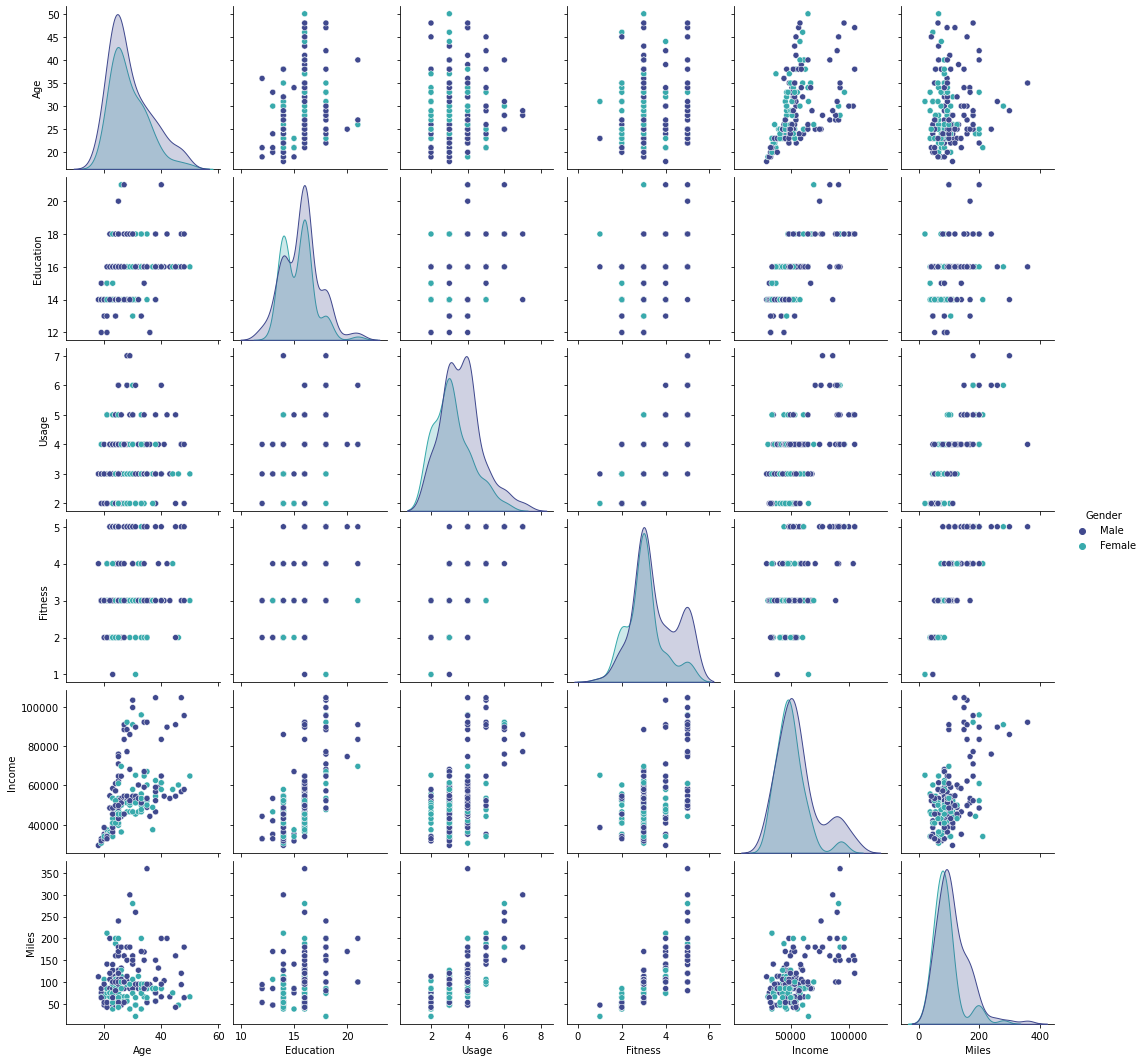

In [29]:
plt.figure(figsize=(10,10))
sns.pairplot(aerofit_data_temp, hue = 'Gender', palette='mako')
plt.show()

# Customer Profiling - Categorization of users.

In [30]:
(aerofit_data_temp.fitness_category.value_counts()/len(aerofit_data_temp)).round(2)

Above Average    0.54
Excellet         0.17
Below Average    0.14
Good             0.13
Poor             0.01
Name: fitness_category, dtype: float64

In [31]:
(aerofit_data_temp.age_group.value_counts()/len(aerofit_data_temp)).round(2)

Adult          0.75
Middle Aged    0.12
Teen           0.09
Elder          0.03
Name: age_group, dtype: float64

In [32]:
aerofit_melt = aerofit_data_temp[['Gender','MaritalStatus','Product']].melt()
(aerofit_melt.groupby(['variable','value'])['value'].count()/len(aerofit_data_temp)).round(2)

variable       value    
Gender         Female       0.42
               Male         0.58
MaritalStatus  Partnered    0.59
               Single       0.41
Product        KP281        0.44
               KP481        0.33
               KP781        0.22
Name: value, dtype: float64

Insights: Male adult customers with an above-average fitness level who are partnered and using KP281 are in the majority.

# Marginal and Conditional  Probabilities

In [33]:
#Marginal Probability Gender and product

pd.crosstab(aerofit_data_temp.Product, aerofit_data_temp.Gender, normalize= True,margins= True,
            margins_name = 'Total').round(2)

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


Probability of Female aerofit customers using any product P(Female) = 0.42

Probability of Male aerofit customers using any product P(Male) = 0.58

Probability of aerofit customers buying product KP281 P(KP281) = 0.44

Probability of aerofit customers buying product KP481 P(KP481) = 0.33

Probability of aerofit customers buying product KP781 P(KP781) = 0.22

Insights: From the above information it is known that there are more number male customers and customers using 
          KP281 are high than the other models, where are Female to Male ratio who are using KP281 model are is 
          equal.
          KP781 model is less used over all and Female to Male ratio using this model is almost 1 : 4.5.
          Model KP481 is moderatley used gy customers and Female to Male ratio is almost equal.

In [34]:
#Conditional Probability of a product for a given Gender

pd.crosstab(aerofit_data_temp.Product, aerofit_data_temp.Gender,margins=True,normalize= 'columns',
            margins_name = 'Fraction_of_Product').round(2)

Gender,Female,Male,Fraction_of_Product
Product,,,
KP281,0.53,0.38,0.44
KP481,0.38,0.30,0.33
KP781,0.09,0.32,0.22


Probabilty of customers using KP281 who are Female: P(KP281|Female) = 0.53

Probabilty of customers using KP281 who are Male: P(KP281|Male) = 0.38

Probabilty of customers using KP481 who are Female: P(KP481|Female) = 0.38

Probabilty of customers using KP481 who are Male: P(KP481|Male) = 0.30

Probabilty of customers using KP781 who are Female: P(KP781|Female) = 0.09

Probabilty of customers using KP781 who are Male: P(KP781|Male) = 0.32

Insights: Taking Gender into consideration the over all female customers are giving highest preference to use 
          model KP281 and least preference to use model KP781.
          Even male customers prefer model KP281 over other models.

What is the probability of a male customer buying a KP781 treadmill?

    P(KP781|Male) = 0.32

In [35]:
# Marginal probability age_group and product
pd.crosstab(aerofit_data_temp.Product, aerofit_data_temp.age_group, normalize=True,margins= True,
            margins_name = 'Total').round(2)

age_group,Teen,Adult,Middle Aged,Elder,Total
Product,,,,,
KP281,0.06,0.31,0.06,0.02,0.44
KP481,0.04,0.25,0.04,0.01,0.33
KP781,0.00,0.19,0.02,0.01,0.22
Total,0.09,0.75,0.12,0.03,1.00


Probability of aerofit customers who are teen agers: P(Teen) = 0.09

Probability of aerofit customers who are adults: P(Adult) = 0.75

Probability of aerofit customers who are middle aged: P(Middle_age) = 0.12

Probability of aerofit customers who are elders: P(Elder) = 0.03

Insights: Over all aerofit customers are adults followed by middle-aged group.

In [36]:
#Conditional probability of using a product for a given age_group
pd.crosstab(aerofit_data_temp.Product, aerofit_data_temp.age_group, normalize= 'columns',margins= True,
            margins_name = 'Fraction_of_Product').round(2)

age_group,Teen,Adult,Middle Aged,Elder,Fraction_of_Product
Product,,,,,
KP281,0.59,0.41,0.50,0.50,0.44
KP481,0.41,0.33,0.32,0.17,0.33
KP781,0.00,0.25,0.18,0.33,0.22


Insights: All the age_groups prefer using KP281 are more compared to other models. 
KP481 is moderately bought buy customers of all age groups where as KP781 is the least bought model
          Teens using KP781 is almost zero.

In [37]:
# Marginal Probability of fitness_category
pd.crosstab(aerofit_data_temp.Product, aerofit_data_temp.fitness_category, normalize=True, margins = True,
           margins_name='Total').round(2)

fitness_category,Above Average,Below Average,Excellet,Good,Poor,Total
Product,,,,,,
KP281,0.30,0.08,0.01,0.05,0.01,0.44
KP481,0.22,0.07,0.00,0.04,0.01,0.33
KP781,0.02,0.00,0.16,0.04,0.00,0.22
Total,0.54,0.14,0.17,0.13,0.01,1.00


Probability of aerofit customers with Poor fitness: P(Poor)= 0.01

Probability of aerofit customers with Poor fitness: P(BelowAverage)= 0.14

Probability of aerofit customers with Poor fitness: P(AboveAverage)= 0.54

Probability of aerofit customers with Poor fitness: P(Good)= 0.13

Probability of aerofit customers with Poor fitness: P(Excellent)= 0.17

Insights: From the above information we can say that maximum aerofit customers are with AboveAverage fitness(3), 
where as minimum customers are with Poor Fitness(1).

In [38]:
#Conditional probability of fitness_category for a given product
pd.crosstab(aerofit_data_temp.Product, aerofit_data_temp.fitness_category, normalize='columns', margins = True,
           margins_name='Fraction_of_Product').round(2)

fitness_category,Above Average,Below Average,Excellet,Good,Poor,Fraction_of_Product
Product,,,,,,
KP281,0.56,0.54,0.06,0.38,0.5,0.44
KP481,0.40,0.46,0.00,0.33,0.5,0.33
KP781,0.04,0.00,0.94,0.29,0.0,0.22


Insights: 
          
          Maximum AboveAverage,BelowAverage,Good,Poor fitnesslevel customers tend to buy KP281(Beginner Model).

          Minimum AboveAverage,BelowAverage,Good,Poor fitness level customers tend to buy KP781(Advanced Model).
          
          Maximum Excellent Fitness level customers are contributing to the sales of KP781(Advanced Model).
          
          A moderate number of customers with good fitness level are contributing to the sales of KP781.
          
          A moderate number of customers are all fitness level except Excellent are contributing to the sales of KP481.

In [39]:
#Marginal Probability MaritalStatus and product

pd.crosstab(aerofit_data_temp.Product, aerofit_data_temp.MaritalStatus, normalize= True,margins= True,
            margins_name = 'Total').round(2)

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


Probability of Parterend customers: P(Partnered)= 0.59
    
Probability of Single customers: P(Single)= 0.41
    
Insights: Partnered customers are a bit more compared to single customers.

In [40]:
#Conditional probability of using a product for a given MaritalStatus
pd.crosstab(aerofit_data_temp.Product, aerofit_data_temp.MaritalStatus, normalize= 'columns',margins= True,
            margins_name = 'Fraction_of_Product').round(2)

MaritalStatus,Partnered,Single,Fraction_of_Product
Product,,,
KP281,0.45,0.44,0.44
KP481,0.34,0.33,0.33
KP781,0.21,0.23,0.22


Probability of Partnered customers buying KP281: P(KP281|Partnered)=0.45
    
Probability of Single customers buying KP281: P(KP281|Single)=0.44
    
Probability of Partnered customers buying KP481: P(KP481|Partnered)=0.34
    
Probability of Single customers buying KP481: P(KP481|Partnered)=0.33
    
Probability of Partnered customers buying KP781: P(KP781|Partnered)=0.21
    
Probability of Single customers buying KP781: P(KP781|Partnered)=0.23

Insights: Chances of Partnered customers buying KP281,KP481,KP781 is a bit more than single customers where as maximum Partnered 
    customers bought KP281